<a href="https://colab.research.google.com/github/hariniiy/Harini---APPLICATIONS-OF-DATAMINING/blob/main/vine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Alcohol  Proline
0    14.23     1065
1    13.20     1050
2    13.16     1185
3    14.37     1480
4    13.24      735


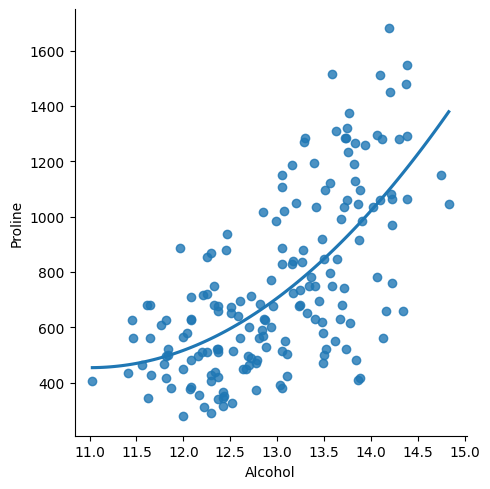

Model Score: 0.431452496313669


<ipython-input-1-937c81e90b8f>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_selected.fillna(method='ffill', inplace=True)
<ipython-input-1-937c81e90b8f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.fillna(method='ffill', inplace=True)


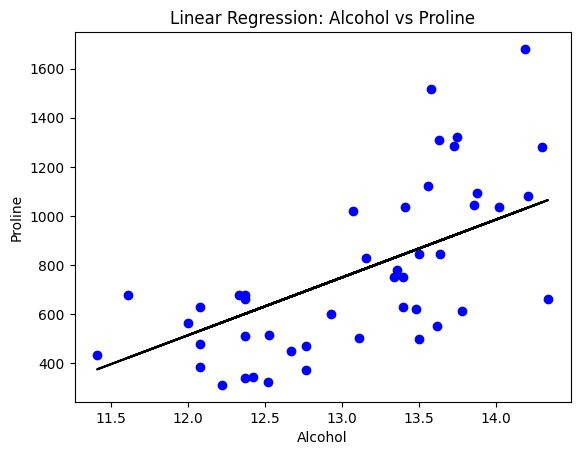

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('/content/wine.csv')

# Selecting Alcohol as independent variable and Proline as dependent variable
df_selected = df[['Alcohol', 'Proline']]
df_selected.columns = ['Alcohol', 'Proline']

# Display first 5 rows
print(df_selected.head())

# Scatter plot to visualize the relationship
sns.lmplot(x="Alcohol", y="Proline", data=df_selected, order=2, ci=None)
plt.show()

# Handling missing values
df_selected.fillna(method='ffill', inplace=True)

# Converting to numpy arrays for model training
X = np.array(df_selected['Alcohol']).reshape(-1, 1)
y = np.array(df_selected['Proline']).reshape(-1, 1)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Training the Linear Regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Model performance
print("Model Score:", regr.score(X_test, y_test))

# Predictions
y_pred = regr.predict(X_test)

# Plotting the regression line
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='k')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('Linear Regression: Alcohol vs Proline')
plt.show()


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Load the Titanic dataset with error handling
df = pd.read_csv('/content/titanic (1).csv', delimiter=',', on_bad_lines='skip')

# Strip column names of any extra spaces
df.columns = df.columns.str.strip()

# Check if 'Sex' column exists before processing
if 'Sex' not in df.columns:
    raise KeyError("Column 'Sex' not found in dataset. Check the dataset structure.")

    # Selecting relevant features
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

    # Convert categorical 'Sex' column to numeric
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'].astype(str))

    # Fill missing values in 'Age' and 'Fare' with median
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Extract features and target variable
    X = df[features]
    y = df['Survived']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
